# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [3]:
# Your code here
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [4]:
# Your code here
# Load the dataset
df = pd.read_csv("data/ames.csv", index_col=0)

# Preview the data
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [6]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

Now, print out the mean, median, and standard deviation:

In the cell below, interpret the above information.

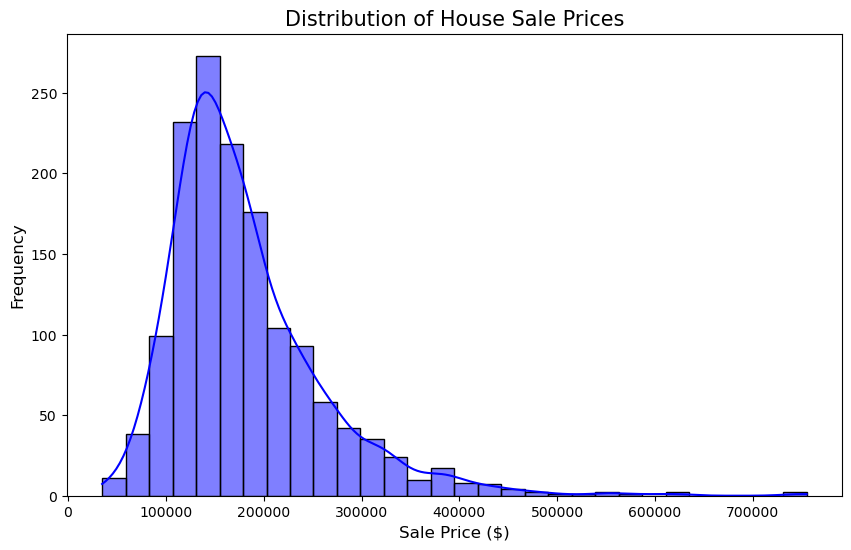

In [9]:
# Your code here
# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, color='blue', bins=30)

# Add titles and labels
plt.title('Distribution of House Sale Prices', fontsize=15)
plt.xlabel('Sale Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

In [14]:
# Calculate statistics for SalePrice
mean_sp = df['SalePrice'].mean()
median_sp = df['SalePrice'].median()
std_sp = df['SalePrice'].std()

# Print the results
print(f"--- SalePrice Statistics ---")
print(f"Mean:   ${mean_sp:,.2f}")
print(f"Median: ${median_sp:,.2f}")
print(f"Std Dev: ${std_sp:,.2f}")

--- SalePrice Statistics ---
Mean:   $180,921.20
Median: $163,000.00
Std Dev: $79,442.50


In [10]:
# Replace None with appropriate text
"""
The distribution of SalePrice is right-skewed, indicating that the majority of houses 
in Ames are sold at lower to mid-range prices (typically between $130,000 and $215,000). 
There are a few luxury properties acting as outliers on the high end, with prices 
reaching up to $755,000.
"""

'\nThe distribution of SalePrice is right-skewed, indicating that the majority of houses \nin Ames are sold at lower to mid-range prices (typically between $130,000 and $215,000). \nThere are a few luxury properties acting as outliers on the high end, with prices \nreaching up to $755,000.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

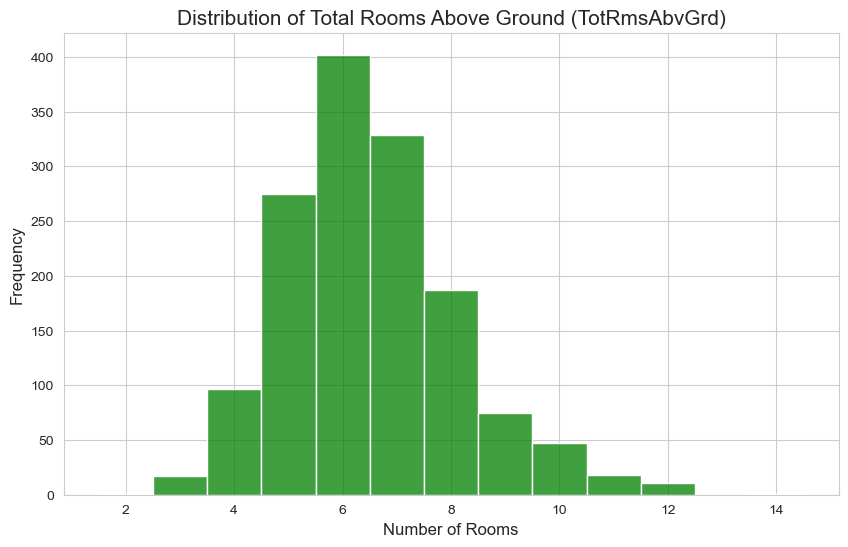

In [19]:
# Your code here
# Create the plot
plt.figure(figsize=(10, 6))
# 'discrete=True' is used because room counts are whole numbers
sns.histplot(df['TotRmsAbvGrd'], kde=False, color='green', discrete=True)
# Add titles and labels
plt.title('Distribution of Total Rooms Above Ground (TotRmsAbvGrd)', fontsize=15)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Now, print out the mean, median, and standard deviation:

In [20]:
#calculate stats here
rooms_mean = df["TotRmsAbvGrd"].mean()
rooms_median = df["TotRmsAbvGrd"].median()
rooms_std = df["TotRmsAbvGrd"].std()

print(f"Mean:   {rooms_mean:,.2f}")
print(f"Median: {rooms_median:,.2f}")
print(f"Std:    {rooms_std:,.2f}")

Mean:   6.52
Median: 6.00
Std:    1.63


In the cell below, interpret the above information.

In [13]:
# Replace None with appropriate text
"""
The mean number of rooms above ground is approximately 6.52, while the median is 6.00. 
This indicates that a typical home in this dataset has about 6 to 7 rooms. 
The standard deviation of 1.63 suggests that most properties fall within the 
range of 5 to 8 rooms, showing relatively consistent housing sizes across the 
Ames community with only a few exceptionally large or small homes.
"""

'\nThe mean number of rooms above ground is approximately 6.52, while the median is 6.00. \nThis indicates that a typical home in this dataset has about 6 to 7 rooms. \nThe standard deviation of 1.63 suggests that most properties fall within the \nrange of 5 to 8 rooms, showing relatively consistent housing sizes across the \nAmes community with only a few exceptionally large or small homes.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

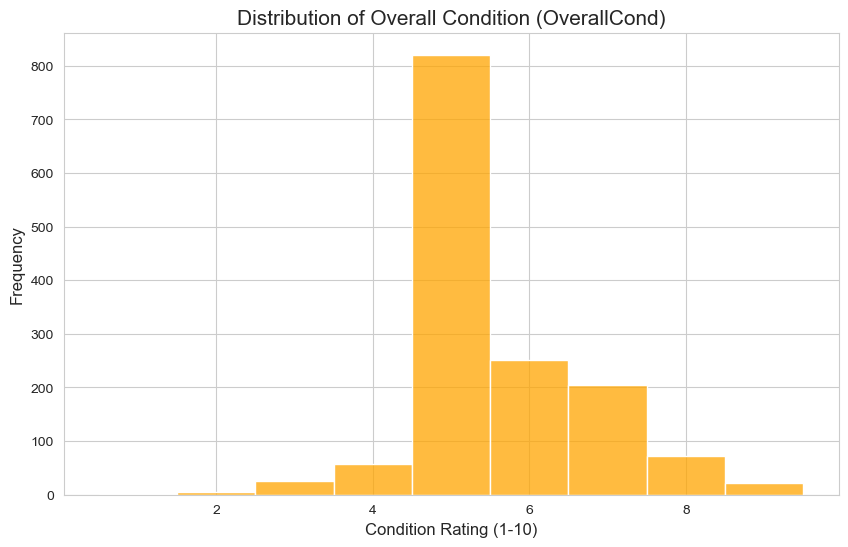

In [15]:
# Your code here
# Set the visual style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
# Using discrete=True because condition is an ordinal integer rating
sns.histplot(df['OverallCond'], kde=False, color='orange', discrete=True)

# Add titles and labels
plt.title('Distribution of Overall Condition (OverallCond)', fontsize=15)
plt.xlabel('Condition Rating (1-10)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [16]:
# Your code here
# Calculate statistics for OverallCond
mean_oc = df['OverallCond'].mean()
median_oc = df['OverallCond'].median()
std_oc = df['OverallCond'].std()

# Print the results
print(f"--- OverallCond Statistics ---")
print(f"Mean:   {mean_oc:.2f}")
print(f"Median: {median_oc:.2f}")
print(f"Std Dev: {std_oc:.2f}")

--- OverallCond Statistics ---
Mean:   5.58
Median: 5.00
Std Dev: 1.11


In the cell below, interpret the above information.

In [21]:
# Replace None with appropriate text
"""
The OverallCond variable measures the rating of the overall condition of the house 
on a scale from 1 to 10. The distribution shows a very high peak at 5, meaning 
the vast majority of homes are in 'Average' condition. With a mean of 5.58 and 
a median of 5.00, the data is relatively concentrated, though the standard 
deviation of 1.11 indicates some spread toward 'Above Average' (6) and 
'Good' (7) ratings. Ratings below 4 or above 8 are extremely rare in this dataset.
"""

"\nThe OverallCond variable measures the rating of the overall condition of the house \non a scale from 1 to 10. The distribution shows a very high peak at 5, meaning \nthe vast majority of homes are in 'Average' condition. With a mean of 5.58 and \na median of 5.00, the data is relatively concentrated, though the standard \ndeviation of 1.11 indicates some spread toward 'Above Average' (6) and \n'Good' (7) ratings. Ratings below 4 or above 8 are extremely rare in this dataset.\n"

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [24]:
# Replace None with appropriate code
below_average_condition = df[df["OverallCond"] < 5]
average_condition = df[df["OverallCond"] == 5]
above_average_condition = df[df["OverallCond"] > 5]

The following code checks that you created the subsets correctly:

In [25]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

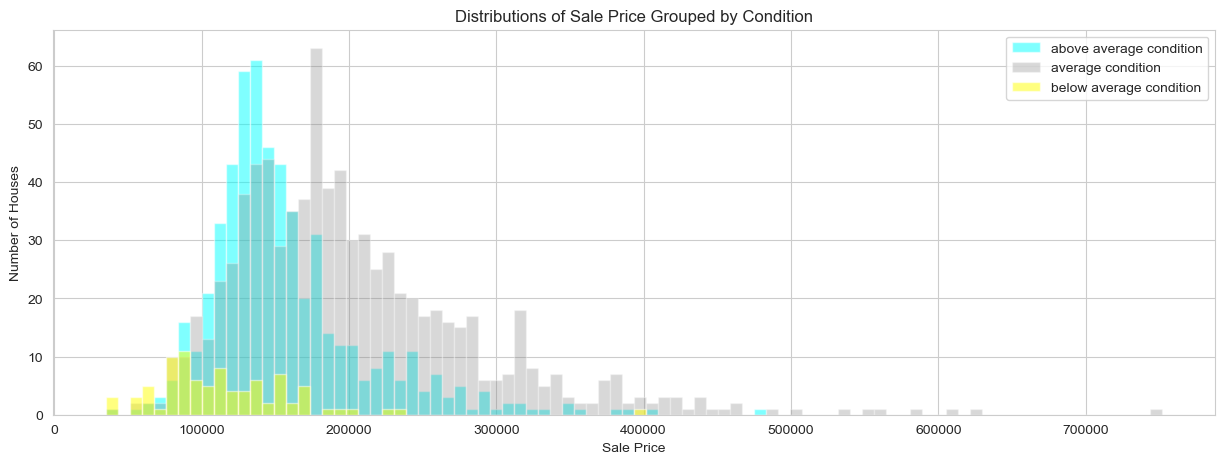

In [26]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend()
plt.show()

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [27]:
# Replace None with appropriate text
"""
The plot compares SalePrice distributions for houses with below average, average, and above average OverallCond.

Overall, houses with below average condition are concentrated at the lower end of sale prices, while houses with
above average condition tend to shift toward higher prices. However, the three distributions overlap heavily,
which suggests OverallCond alone does not strongly determine SalePrice.

What is a bit surprising is how much overlap there is between the “average” and “above average” groups, and that
many high-priced homes still appear in the average-condition category. This implies that other factors (such as
size, location, and overall quality/finish) may have a bigger impact on price than OverallCond by itself.
"""

'\nThe plot compares SalePrice distributions for houses with below average, average, and above average OverallCond.\n\nOverall, houses with below average condition are concentrated at the lower end of sale prices, while houses with\nabove average condition tend to shift toward higher prices. However, the three distributions overlap heavily,\nwhich suggests OverallCond alone does not strongly determine SalePrice.\n\nWhat is a bit surprising is how much overlap there is between the “average” and “above average” groups, and that\nmany high-priced homes still appear in the average-condition category. This implies that other factors (such as\nsize, location, and overall quality/finish) may have a bigger impact on price than OverallCond by itself.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [28]:
# Your code here
corrs = df.corr(numeric_only=True)["SalePrice"].drop("SalePrice").sort_values(ascending=False)
most_pos_col = corrs.index[0]
most_pos_val = corrs.iloc[0]

print("Most positively correlated with SalePrice:", most_pos_col)
print("Correlation:", most_pos_val)

Most positively correlated with SalePrice: OverallQual
Correlation: 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [29]:
# Your code here
corrs = df.corr(numeric_only=True)["SalePrice"].drop("SalePrice").sort_values()
most_neg_col = corrs.index[0]
most_neg_val = corrs.iloc[0]

print("Most negatively correlated with SalePrice:", most_neg_col)
print("Correlation:", most_neg_val)

Most negatively correlated with SalePrice: KitchenAbvGr
Correlation: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

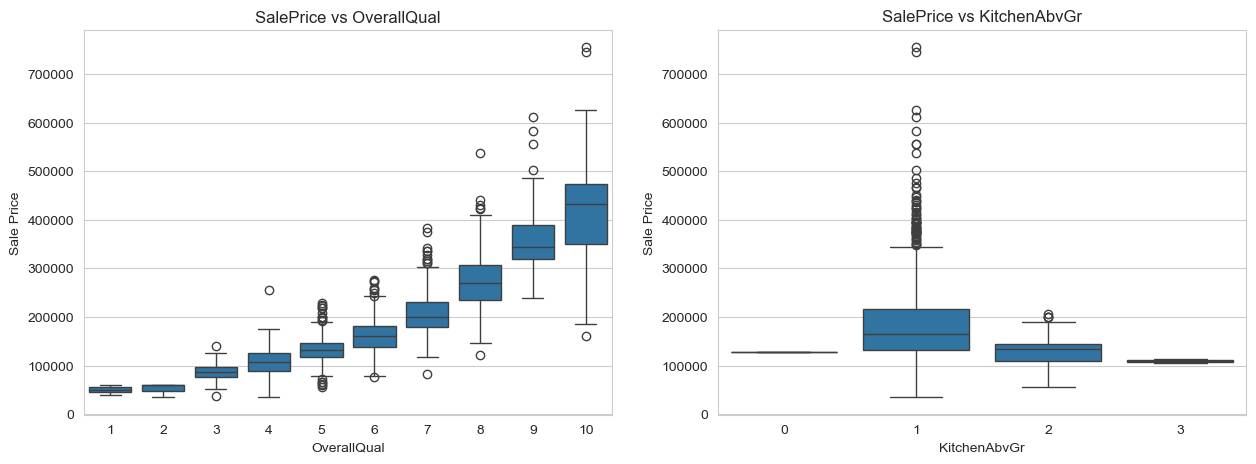

In [30]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_pos_col],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_neg_col],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"SalePrice vs {most_pos_col}")
ax1.set_xlabel(most_pos_col)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"SalePrice vs {most_neg_col}")
ax2.set_xlabel(most_neg_col)
ax2.set_ylabel("Sale Price")
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [31]:
# Replace None with appropriate text
"""
**SalePrice vs OverallQual**
OverallQual (overall material/finish quality, rated 1–10) shows a very strong positive relationship with SalePrice.
As OverallQual increases, the median sale price rises sharply, and the entire distribution shifts upward. This
suggests that overall quality is one of the strongest drivers of home prices in this dataset.

**SalePrice vs KitchenAbvGr**
KitchenAbvGr is the number of kitchens above grade. Most homes have 1 kitchen, and that group contains the widest
range of prices (including many high-priced homes). Homes with 2 or 3 kitchens tend to have lower median prices
than homes with 1 kitchen, which is somewhat surprising at first.

A likely explanation is that having multiple kitchens often indicates multi-family units, conversions, or less
typical properties, which may sell for less than single-family homes—so “more kitchens” does not necessarily mean
a more expensive house in this dataset.
"""

'\n**SalePrice vs OverallQual**\nOverallQual (overall material/finish quality, rated 1–10) shows a very strong positive relationship with SalePrice.\nAs OverallQual increases, the median sale price rises sharply, and the entire distribution shifts upward. This\nsuggests that overall quality is one of the strongest drivers of home prices in this dataset.\n\n**SalePrice vs KitchenAbvGr**\nKitchenAbvGr is the number of kitchens above grade. Most homes have 1 kitchen, and that group contains the widest\nrange of prices (including many high-priced homes). Homes with 2 or 3 kitchens tend to have lower median prices\nthan homes with 1 kitchen, which is somewhat surprising at first.\n\nA likely explanation is that having multiple kitchens often indicates multi-family units, conversions, or less\ntypical properties, which may sell for less than single-family homes—so “more kitchens” does not necessarily mean\na more expensive house in this dataset.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [32]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

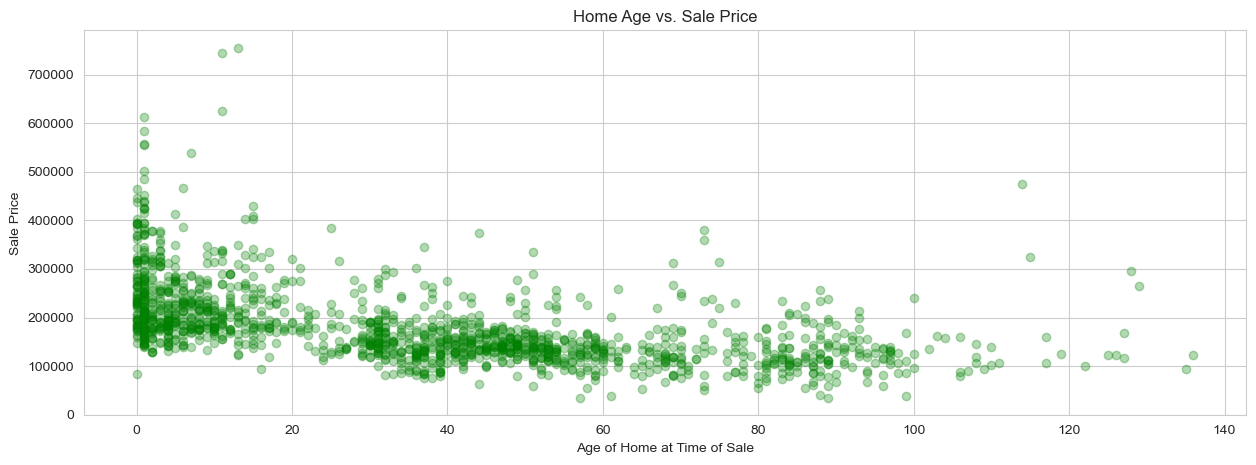

In [33]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price")
plt.show()

Interpret this plot below:

In [34]:
# Replace None with appropriate text
"""
The scatter plot shows a general negative relationship between home age and SalePrice. 
As the age of the home increases, the sale price tends to decrease. This suggests that 
newer homes generally sell for higher prices compared to older homes.

However, the relationship is not perfectly linear. There is still considerable spread 
in sale prices at almost every age level, indicating that age alone does not determine 
price. Other factors such as overall quality, size, and location likely play a major role.

We also observe that very new homes (low age values) tend to have some of the highest 
sale prices, while very old homes rarely reach the highest price levels.
"""

'\nThe scatter plot shows a general negative relationship between home age and SalePrice. \nAs the age of the home increases, the sale price tends to decrease. This suggests that \nnewer homes generally sell for higher prices compared to older homes.\n\nHowever, the relationship is not perfectly linear. There is still considerable spread \nin sale prices at almost every age level, indicating that age alone does not determine \nprice. Other factors such as overall quality, size, and location likely play a major role.\n\nWe also observe that very new homes (low age values) tend to have some of the highest \nsale prices, while very old homes rarely reach the highest price levels.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.